In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# Sadece Jupyter Notebook için

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2

In [89]:
ımg = cv2.imread("some/wrong/path.jpg")
print(ımg)

None


In [4]:
ımg_1 = cv2.imread("../DATA/00-puppy.jpg")

In [91]:
ımg_1

array([[[78, 81, 95],
        [80, 83, 97],
        [81, 84, 98],
        ...,
        [22, 27, 25],
        [22, 27, 25],
        [22, 27, 25]],

       [[78, 81, 95],
        [79, 82, 96],
        [79, 82, 96],
        ...,
        [22, 27, 25],
        [22, 27, 25],
        [22, 27, 25]],

       [[78, 81, 95],
        [77, 80, 94],
        [77, 80, 94],
        ...,
        [22, 27, 25],
        [22, 27, 25],
        [22, 27, 25]],

       ...,

       [[20, 29, 19],
        [21, 30, 20],
        [21, 30, 20],
        ...,
        [22, 30, 23],
        [23, 31, 24],
        [23, 31, 24]],

       [[21, 30, 20],
        [21, 30, 20],
        [20, 29, 19],
        ...,
        [22, 30, 23],
        [23, 31, 24],
        [23, 31, 24]],

       [[21, 30, 20],
        [20, 29, 19],
        [20, 29, 19],
        ...,
        [22, 30, 23],
        [23, 31, 24],
        [23, 31, 24]]], dtype=uint8)

In [29]:
print(ımg_1.shape)
print(type(ımg_1))

(1300, 1950, 3)
<class 'numpy.ndarray'>


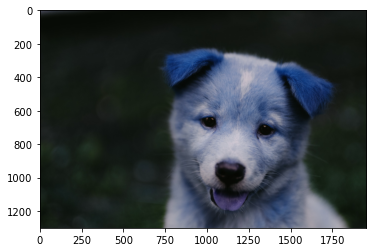

In [25]:
resim = cv2.imread("../DATA/00-puppy.jpg")
plt.imshow(resim)

Görüntü, openCV tarafından numpy dizisi olarak doğru bir şekilde yüklendi
ancak her pikselin rengi BGR olarak sıralandı. 
Matplotlib'in grafiği bir RGB görüntüsü bekler, 
bu nedenle görüntünün doğru bir şekilde görüntülenmesi için bu kanalların değiştirilmesi gerekir
Bu işlem cv2.cvtColor() openCV dönüştürme işlevleri kullanılarak veya doğrudan numpy dizisiyle çalışılarak yapılabilir.

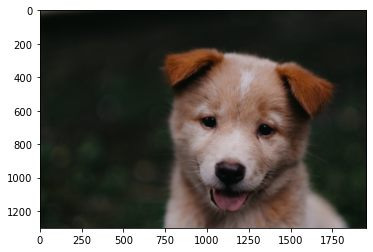

In [26]:
# MATPLOTLİB --> RGB RED GREEN BLUE
# OPENCV --> BGR BLUE GREEN RED

resim = cv2.cvtColor(resim, cv2.COLOR_BGR2RGB)    # (source, color code) --> BGR to RGB
plt.imshow(resim)

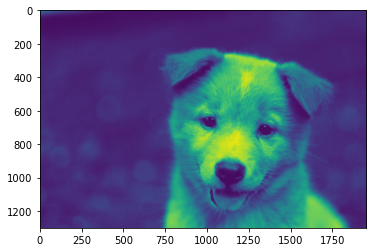

In [30]:
ımg_gray = cv2.imread("../DATA/00-puppy.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(ımg_gray);

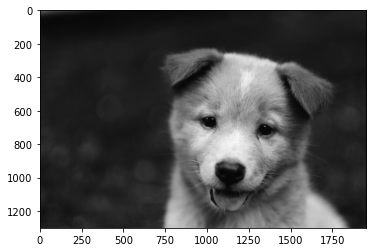

In [34]:
ımg_gray = cv2.imread("../DATA/00-puppy.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(ımg_gray, cmap="gray");

### Resize Images --> Resimleri Yeniden Boyutlandırma

In [40]:
resim.shape

# width, height, color channels

# genişlik, yükseklik, resim kanalları

(1300, 1950, 3)

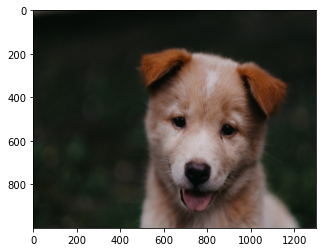

In [46]:
resim = cv2.resize(resim,  dsize = (1300,1000))
plt.imshow(resim);

### By Raito --> Orana Göre

In [47]:
w_ratio = 0.5  # Genişlik   # Bu Oranlar Görüntüyü Yarı Yarıya Düsürmek icin
h_ratio = 0.5  # Yükselik

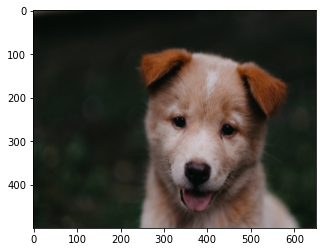

In [60]:
yeni_resim = cv2.resize(resim,(0,0),resim,w_ratio,h_ratio)  #Yeniden boyutlandırmak için
plt.imshow(yeni_resim)

In [66]:
print(yeni_resim.max()) # Renklere bakarız.
print(yeni_resim.min())
print(yeni_resim.shape)   # (500, 650, 3)

print(resim.shape)        # (1000, 1300, 3)

212
2
(500, 650, 3)
(1000, 1300, 3)


In [71]:
%matplotlib qt   # qt --> Arayüz
plt.imshow(yeni_resim)

### Flipping Images --> Görüntüyü Çevirmek

In [72]:
%matplotlib inline

# ürettiğiniz matplotlib grafikleri defterin içine gömülür ve tam bir belge oluşturmanızı sağlar.

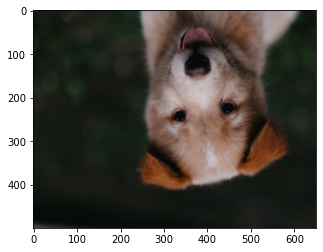

In [73]:
yeni_resim = cv2.flip(yeni_resim, 0)  # X Eksenine Göre Ters Çevir
plt.imshow(yeni_resim)

#    flip(src, flipCode[, dst]) -> dst  ----------->  resim, FlipCode

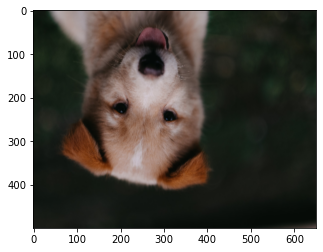

In [77]:
yeni_resim = cv2.flip(yeni_resim, 1)  #Y Eksenine Göre Ters Çevir
plt.imshow(yeni_resim)

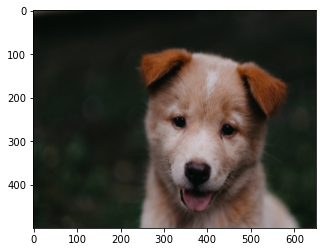

In [78]:
yeni_resim = cv2.flip(yeni_resim, -1)    # iki eksene görede ters çevir
plt.imshow(yeni_resim)

In [79]:
type(yeni_resim)

numpy.ndarray

In [81]:
# Saving Image Files

cv2.imwrite("my_new_picture.jpg", yeni_resim)

True

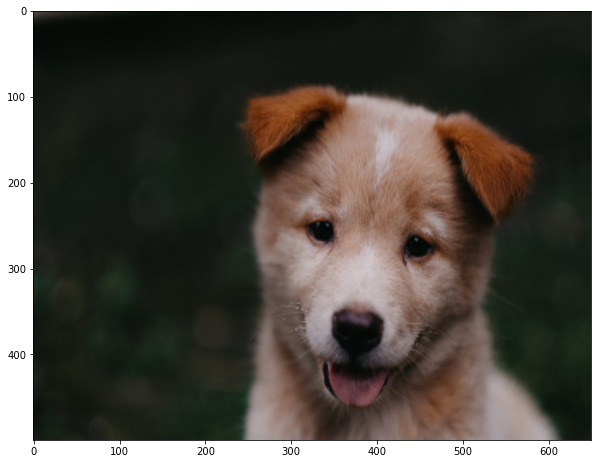

In [85]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.imshow(yeni_resim)  # ax --> Grafiğin kendisi

#### Drawing on Images --> Resimlere Resim Çizme


In [92]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
blank_img = np.zeros(shape = (512,512,3), dtype = int)
blank_img.shape

(512, 512, 3)

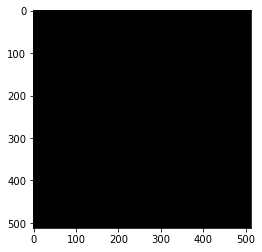

In [94]:
plt.imshow(blank_img)

### Shapes --> Boyutlar


#### Rectangles --> Dikdörtgenler


* imng -> Görüntü
* pt1 -> Dikdörtgenin Tepe Noktası
* pt2 -> pt1'in karşısındaki dikdörtgenin tepe noktası

* colar -> Dikdörtgen rengi veya parlaklığı (Gri tonlamalı Görüntü)
* Thickness [ Kalınlık ] -> Dikdörtgeni oluşturan çizgi kalınlığı  --> #FILLED Gibi negatif değerler, içi doldurulmuş dikdörtgen çizilmesi gerektiği anlamına gelir
* lineType -> Çizgi Türü --> #LineTypes'a bakın
* ShiftNumber -> Kordinatlarındaki kesirli bitlerin sayisi+

In [99]:
# pt1 = top left  ---> sol üst
# pt2 = bottom right  ---> sağ alt
# color -> Renk (0,255,0) -> Yeşil 
# thickness --> Dikdörtgen Kalınlığı

cv2.rectangle(blank_img, pt1 = (350,0), pt2 = (500,128), color = (0,255,0), thickness = 10)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]])

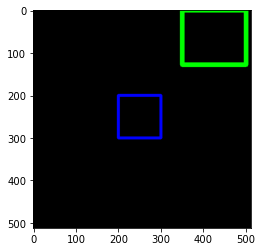

In [100]:
# cv2.rectangle(blank_img,pt1=(384,0),pt2=(510,128),color=(0,255,0))

plt.imshow(blank_img);

**Resmin ortasına mavi bir dikdörtgen çizerek pratik yapalım.**

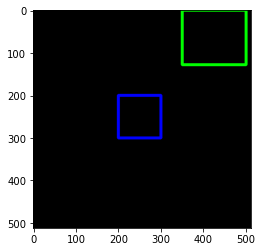

In [98]:
# pt1 = top left
# pt2 = bottom right

cv2.rectangle(blank_img, pt1 = (200,200), pt2 = (300,300), color = (0,0,255), thickness = 5)
plt.imshow(blank_img);

### Circles --> Daireler

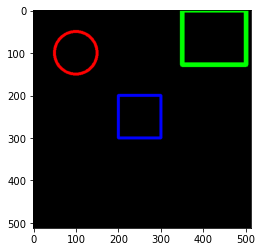

In [102]:
# center -> Merkezi
# radius -> Yaricap
# color -> (255,0,0) -> Kırmızı , (0,0,255) -> Mavi , (0,255,0) -> yeşil

cv2.circle(blank_img, center = (100,100), radius = 50, color = (255,0,0), thickness = 5)
plt.imshow(blank_img);

### Filled In --> Doldrulmuş

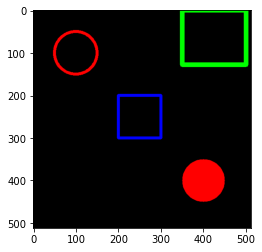

In [104]:
# Thickness [ Kalınlık ] --> -1 olunca dolduruyor.

cv2.circle(blank_img, center = (400,400), radius = 50, color = (255,0,0), thickness = -1)
plt.imshow(blank_img)

### Lines --> Çizgiler

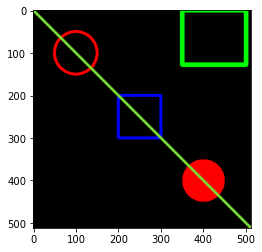

In [108]:
# 5 piksel kalınlığında çapraz mavi bir çizgi çizin

cv2.line(blank_img, pt1 = (0,0), pt2 = (512,512), color = (122,221,50), thickness = 5)
plt.imshow(blank_img)

In [ ]:
# img -> Resim.
# text -> Çizilecek metin dizesi.
# org ->  Görüntüdeki metin dizesinin sol alt köşesi.
# fontFace -> Yazı tipi türü, bkz. #HersheyFonts.
# fontScale -> Yazı tipine özgü taban boyutuyla çarpılan yazı tipi ölçeği faktörü.
# color -> Metin rengi.
# Thickness -> Metin çizmek için kullanılan çizgilerin kalınlığı.
# lineType ->  Satır türü. #LineTypes'a bakın
# bottomLeftOrigin -> true olduğunda, görüntü verilerinin kaynağı sol alttadır

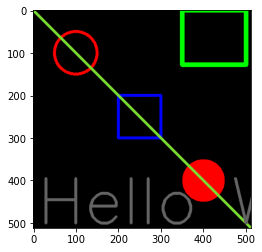

In [113]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(blank_img, text = "Hello", org = (10,500), fontFace = font, fontScale = 5, color = (100,100,100), thickness = 5, lineType = cv2.LINE_AA )
plt.imshow(blank_img)

### Polygons --> Çokgenler 

* Bir çokgen çizmek için önce köşelerin koordinatlarına ihtiyacınız var. Bu noktaları, SATIRLAR'ın köşe sayısı olduğu ve int32 türünde olması gerektiği SATIRx1x2 şeklinde bir dizi haline getirin.

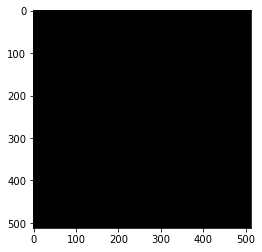

In [114]:
blank_img = np.zeros(shape = (512,512,3), dtype = int)
plt.imshow(blank_img)

In [116]:
koseler = np.array([[100,300],[200,200],[400,300], [250,400]])

pts = koseler.reshape((-1,1,2))
pts

array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[250, 400]]])

In [ ]:
# . img ---> Resim.
# . pts --> Çokgen eğriler dizisi.
# . isClosed ---> Çizilen çoklu çizgilerin kapalı olup olmadığını gösteren bayrak. Kapalılarsa, her eğrinin son köşesinden ilk tepe noktasına bir çizgi çizer.
#  color ---> Çoklu çizgi rengi.
#  thickness ---> Çoklu çizgi kenarlarının kalınlığı.
# lineType ---> Çizgi parçalarının türü. #LineTypes'a bakın
# shift --->Köşe koordinatlarındaki kesirli bitlerin sayısı.

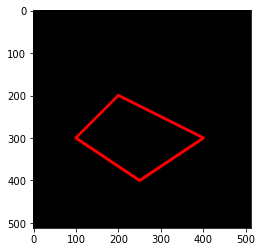

In [117]:
cv2.polylines(blank_img,[pts], isClosed = True, color = (255,0,0), thickness = 5 )
plt.imshow(blank_img)

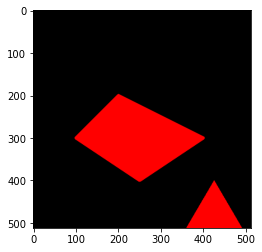

In [120]:
# blank_img = cv2.cvtColor(blank_img, cv2.COLOR_BGR2RGB)
koseler = np.array([[100,300],[200,200],[400,300], [250,400]], dtype = int)

pts = koseler.reshape((-1,1,2))

cv2.fillPoly(blank_img, [pts], color = (255,0,0))
plt.imshow(blank_img)

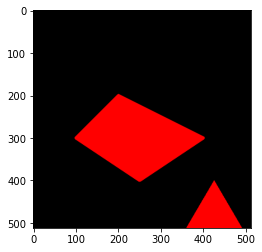

In [121]:
plt.imshow(blank_img)

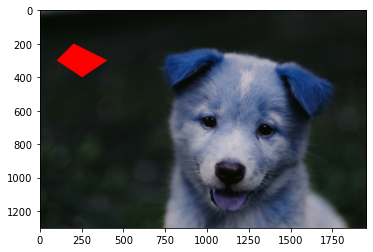

In [8]:
# blank_img = cv2.cvtColor(blank_img, cv2.COLOR_BGR2RGB)
koseler = np.array([[100,300],[200,200],[400,300], [250,400]], dtype = int)

pts = koseler.reshape((-1,1,2))

cv2.fillPoly(ımg_1, [pts], color = (255,0,0))
plt.imshow(ımg_1)